# Number of Experiment Runs and Sequence Distribution

In [6]:
import pandas as pd

df = pd.read_csv('./data/results_anon.csv')

print(df['seq'].value_counts())

seq
BA    52
AB    41
Name: count, dtype: int64


# Check for Normality

In [7]:
import pingouin as pg

pg.normality(df[[
    "time_write_jv",
    "time_write_py",
    "time_read_jv",
    "time_read_py",
    "correctness_write_jv",
    "correctness_write_py",
    "correctness_read_jv",
    "correctness_read_py",
]]).round(3)

,W,pval,normal
time_write_jv,0.851,0.0,False
time_write_py,0.927,0.0,False
time_read_jv,0.784,0.0,False
time_read_py,0.882,0.0,False
correctness_write_jv,0.772,0.0,False
correctness_write_py,0.860,0.0,False
correctness_read_jv,0.719,0.0,False
correctness_read_py,0.789,0.0,False


# Hypotheses tests

In [8]:
import pingouin as pg
import pandas as pd

df = pd.read_csv('./data/results_anon.csv')

df_without_time_read_outliers = df[(df['time_read_py_outlier'] == False) & (df['time_read_jv_outlier'] == False)]
df_without_time_write_outliers = df[(df['time_write_py_outlier'] == False) & (df['time_write_jv_outlier'] == False)]
df_without_correctness_read_outliers = df[(df['correctness_read_py_outlier'] == False) & (df['correctness_read_jv_outlier'] == False)]
df_without_correctness_write_outliers = df[(df['correctness_write_py_outlier'] == False) & (df['correctness_write_jv_outlier'] == False)]

tests = {
    "1a": {
        "test": pg.wilcoxon(df_without_time_read_outliers['time_read_jv'], df_without_time_read_outliers['time_read_py'], alternative='two-sided'),
        "M_jv": df_without_time_read_outliers['time_read_jv'].median(),
        "M_py": df_without_time_read_outliers['time_read_py'].median(),
        "n": len(df_without_time_read_outliers)
    },
    "1b": {
        "test": pg.wilcoxon(df_without_correctness_read_outliers['correctness_read_jv'], df_without_correctness_read_outliers['correctness_read_py'], alternative='two-sided'),
        "M_jv": df_without_correctness_read_outliers['correctness_read_jv'].median(),
        "M_py": df_without_correctness_read_outliers['correctness_read_py'].median(),
        "n": len(df_without_correctness_read_outliers)
    },
    "2a": {
        "test": pg.wilcoxon(df_without_time_write_outliers['time_write_jv'], df_without_time_write_outliers['time_write_py'], alternative='two-sided'),
        "M_jv": df_without_time_write_outliers['time_write_jv'].median(),
        "M_py": df_without_time_write_outliers['time_write_py'].median(),
        "n": len(df_without_time_write_outliers)
    },
    "2b": {
        "test": pg.wilcoxon(df_without_correctness_write_outliers['correctness_write_jv'], df_without_correctness_write_outliers['correctness_write_py'], alternative='two-sided'),
        "M_jv": df_without_correctness_write_outliers['correctness_write_jv'].median(),
        "M_py": df_without_correctness_write_outliers['correctness_write_py'].median(),
        "n": len(df_without_correctness_write_outliers)
    },
}

for test_id, result in tests.items():
    print(f"\nHypothesis {test_id}")
    print("-" * 60)
    print(f'n = {result["n"]}')
    print(f'M_jv = {result["M_jv"]}')
    print(f'M_py = {result["M_py"]}')
    print(result["test"].to_string())
    print()


Hypothesis 1a
------------------------------------------------------------
n = 84
M_jv = 38.60842499999702
M_py = 41.21124999999999
           W-val alternative     p-val       RBC      CLES
Wilcoxon  1459.0   two-sided  0.146597 -0.182633  0.464427


Hypothesis 1b
------------------------------------------------------------
n = 83
M_jv = 0.898989898989899
M_py = 0.898989898989899
           W-val alternative     p-val      RBC      CLES
Wilcoxon  1230.0   two-sided  0.018937  0.29432  0.541951


Hypothesis 2a
------------------------------------------------------------
n = 84
M_jv = 76.655
M_py = 170.05322499999403
          W-val alternative         p-val       RBC      CLES
Wilcoxon  163.0   two-sided  4.775870e-13 -0.908683  0.160289


Hypothesis 2b
------------------------------------------------------------
n = 93
M_jv = 0.9
M_py = 0.5
          W-val alternative     p-val       RBC      CLES
Wilcoxon  463.5   two-sided  0.000003  0.637324  0.658053



# Figures

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_comparison(title, xlabel, df, col1, col2, label1, label2, min_val=None, max_val=None):
    """
    Create a kernel density plot comparing two columns.
    
    Parameters:
        df (pandas.DataFrame): The dataframe containing the data
        col1 (str): Name of first column to plot
        col2 (str): Name of second column to plot
        label1 (str): Legend label for first column
        label2 (str): Legend label for second column
        min_val (float, optional): Minimum value for x-axis
        max_val (float, optional): Maximum value for x-axis
    """
    # Create the plot
    plt.figure(figsize=(5, 5))
    
    # Plot both distributions
    sns.kdeplot(data=df[col1], label=label1, common_norm=False, linewidth=2, cut=0, clip=(min_val, max_val))
    sns.kdeplot(data=df[col2], label=label2, common_norm=False, linewidth=2, cut=0, clip=(min_val, max_val))
    
    # Add labels and title
    plt.ylabel('Density')
    plt.xlabel(xlabel)
    plt.title(title)
    plt.legend()
    
    return plt

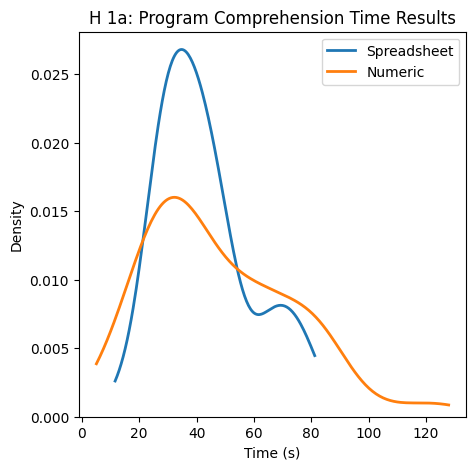

In [10]:
plt = plot_comparison(
    'H 1a: Program Comprehension Time Results',
    'Time (s)',
    df_without_time_read_outliers,
    'time_read_jv',
    'time_read_py',
    'Spreadsheet',
    'Numeric'
)

plt.savefig('figures/time-program-comprehension.pdf', dpi=300, format='pdf', bbox_inches='tight')
plt.show()

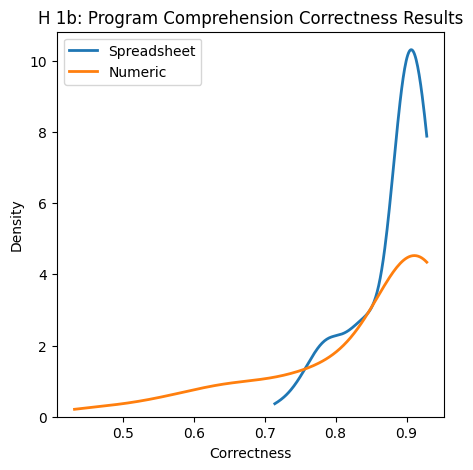

In [ ]:
plt = plot_comparison(
    'H 1b: Program Comprehension Correctness Results',
    'Correctness',
    df_without_correctness_read_outliers,
    'correctness_read_jv',
    'correctness_read_py',
    'Spreadsheet',
    'Numeric',
)

plt.savefig('figures/correctness-program-comprehension.pdf', dpi=300, format='pdf', bbox_inches='tight')
plt.show()

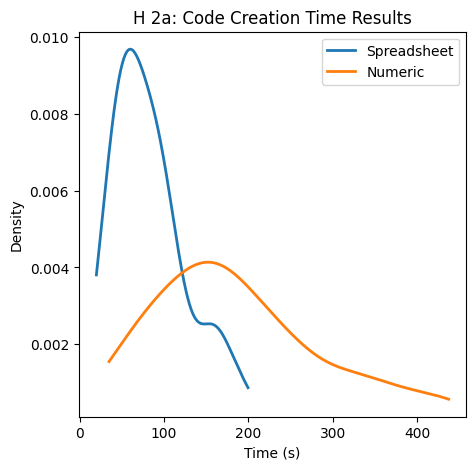

In [12]:
plt = plot_comparison(
    'H 2a: Code Creation Time Results',
    'Time (s)',
    df_without_time_write_outliers,
    'time_write_jv',
    'time_write_py',
    'Spreadsheet',
    'Numeric'
)

plt.savefig('figures/time-code-creation.pdf', dpi=300, format='pdf', bbox_inches='tight')
plt.show()

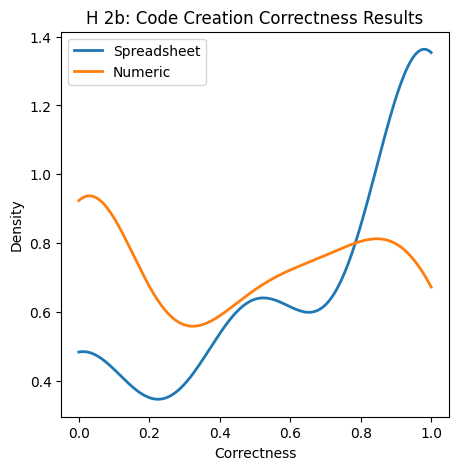

In [ ]:
plt = plot_comparison(
    'H 2b: Code Creation Correctness Results',
    'Correctness',
    df_without_correctness_write_outliers,
    'correctness_write_jv',
    'correctness_write_py',
    'Spreadsheet',
    'Numeric',
)

plt.savefig('figures/correctness-code-creation.pdf', dpi=300, format='pdf', bbox_inches='tight')
plt.show()